## Decision Tree using Gini Index and Entropy

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Life Expectancy Data.csv')
print(df, "\n")

          Country  Year  ... Income composition of resources  Schooling
0     Afghanistan  2015  ...                           0.479       10.1
1     Afghanistan  2014  ...                           0.476       10.0
2     Afghanistan  2013  ...                           0.470        9.9
3     Afghanistan  2012  ...                           0.463        9.8
4     Afghanistan  2011  ...                           0.454        9.5
...           ...   ...  ...                             ...        ...
2933     Zimbabwe  2004  ...                           0.407        9.2
2934     Zimbabwe  2003  ...                           0.418        9.5
2935     Zimbabwe  2002  ...                           0.427       10.0
2936     Zimbabwe  2001  ...                           0.427        9.8
2937     Zimbabwe  2000  ...                           0.434        9.8

[2938 rows x 22 columns] 



### Feature Engineering

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
df=df.iloc[0:800,0:10]

In [ ]:
df.shape

(800, 10)

### Visualization

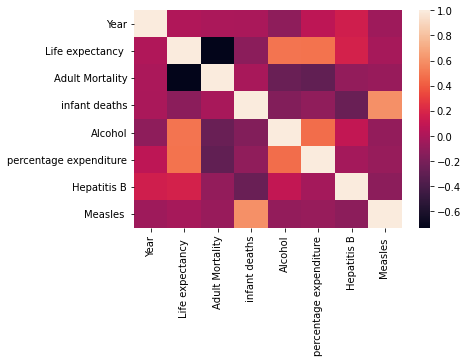

In [ ]:
#view correlation
sns.heatmap(df.corr(), )

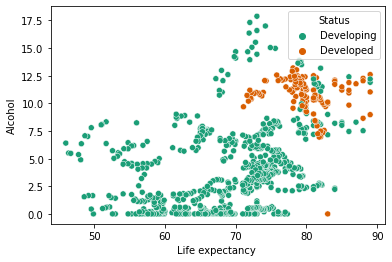

In [ ]:
sns.scatterplot(x='Life expectancy ',y='Alcohol',data=df,hue='Status',palette='Dark2')

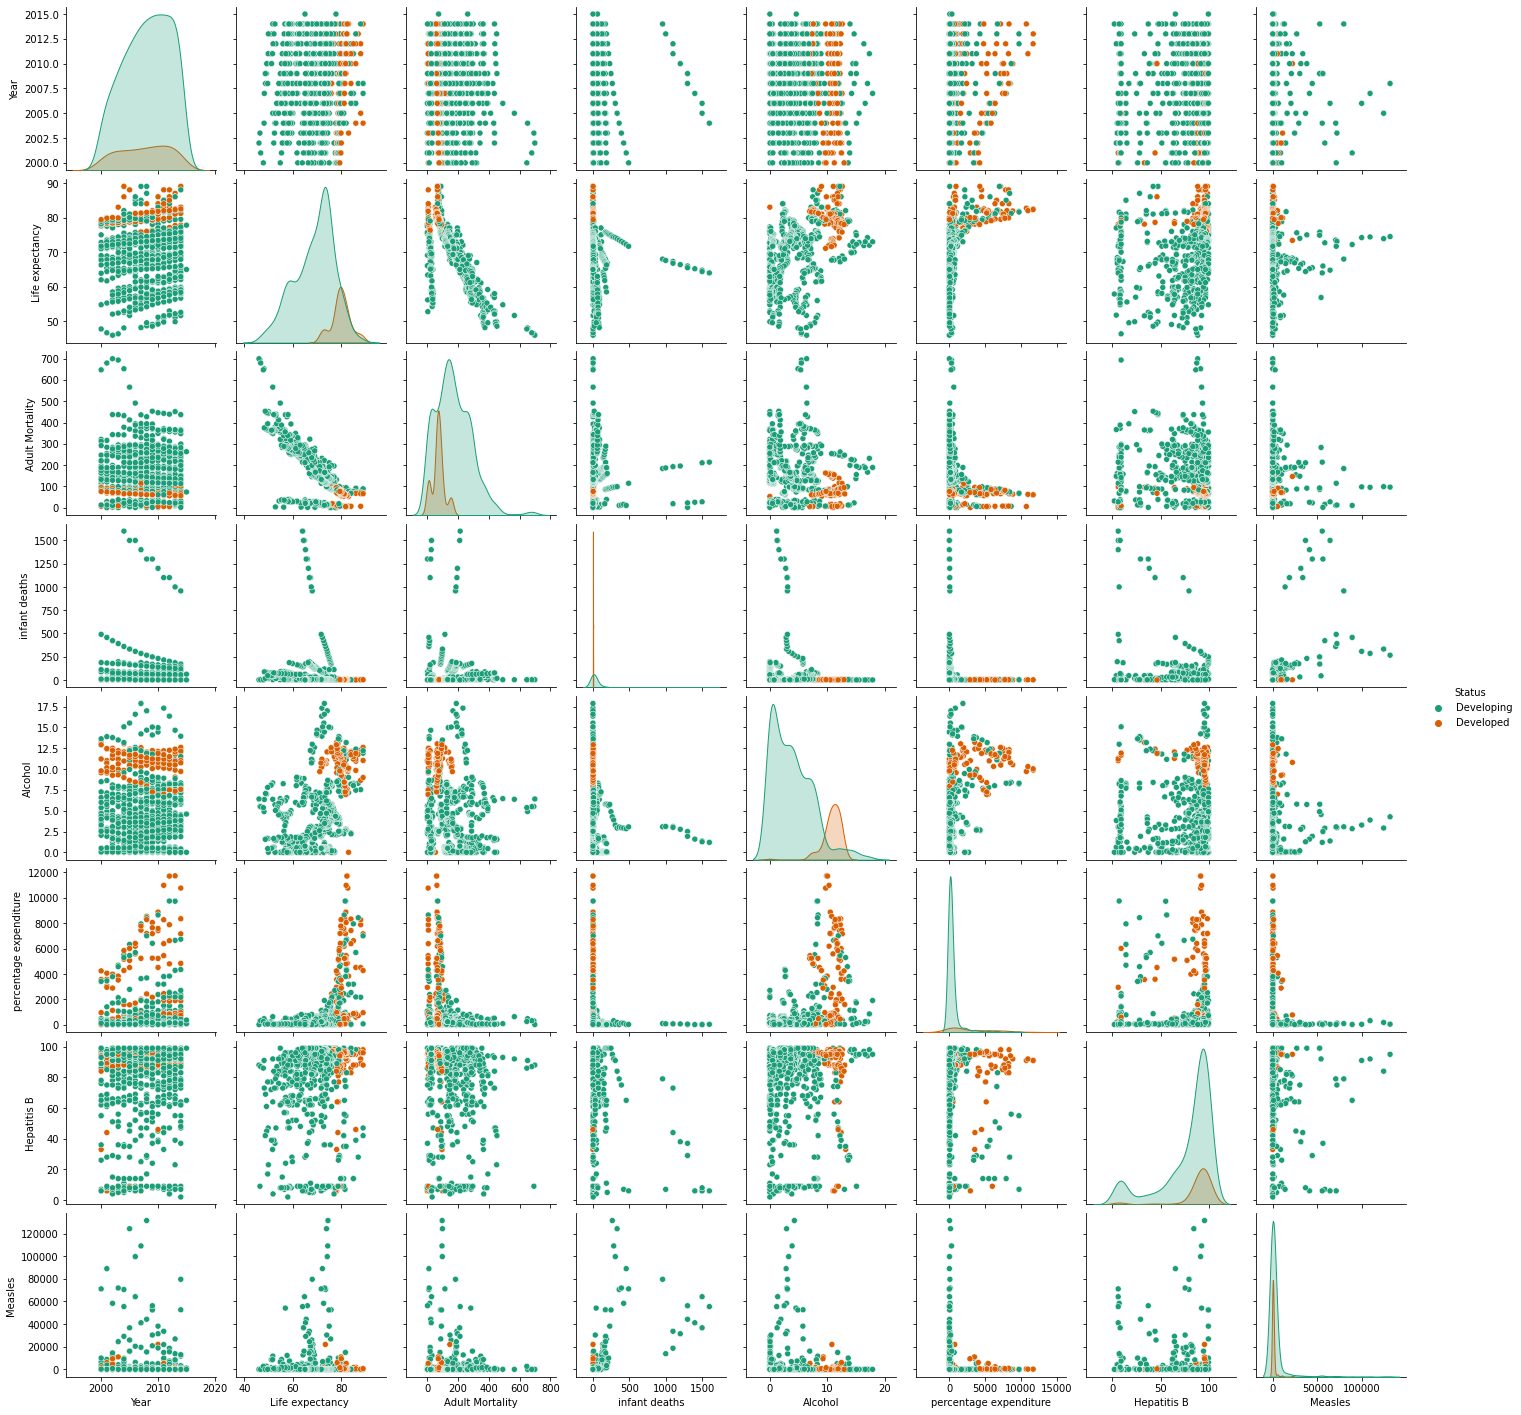

In [ ]:
sns.pairplot(df,hue='Status',palette='Dark2')

### Feature Engineering

In [ ]:
df=df.drop(['Country','Adult Mortality','infant deaths'],axis=1)

In [ ]:
df.head()

,Year,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles
0,2015,Developing,65.0,0.01,71.279624,65.0,1154
1,2014,Developing,59.9,0.01,73.523582,62.0,492
2,2013,Developing,59.9,0.01,73.219243,64.0,430
3,2012,Developing,59.5,0.01,78.184215,67.0,2787
4,2011,Developing,59.2,0.01,7.097109,68.0,3013


### Train | Test Split

In [ ]:
X = pd.get_dummies(df.drop({'Status'},axis=1),drop_first=True)
y = df['Status']

In [ ]:
X

,Year,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles
0,2015,65.0,0.01,71.279624,65.0,1154
1,2014,59.9,0.01,73.523582,62.0,492
2,2013,59.9,0.01,73.219243,64.0,430
3,2012,59.5,0.01,78.184215,67.0,2787
4,2011,59.2,0.01,7.097109,68.0,3013
...,...,...,...,...,...,...
1383,2010,65.3,0.48,18.216614,91.0,0
1384,2009,65.2,0.54,162.290371,86.0,0
1385,2008,65.1,0.46,167.620155,83.0,0
1386,2007,65.0,0.68,188.710877,96.0,0


In [ ]:
y

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
1383    Developing
1384    Developing
1385    Developing
1386    Developing
1387    Developing
Name: Status, Length: 800, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Gini index based Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model =DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred = model.predict(X_test)

### Evaluation of Decision Tree based on Gini index

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 30,   4],
       [  9, 197]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


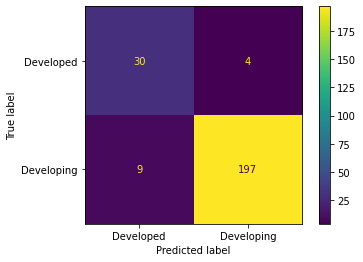

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Developed       0.77      0.88      0.82        34
  Developing       0.98      0.96      0.97       206

    accuracy                           0.95       240
   macro avg       0.87      0.92      0.89       240
weighted avg       0.95      0.95      0.95       240



In [ ]:
model.feature_importances_

array([0.        , 0.10104791, 0.87686382, 0.02208827, 0.        ,
       0.        ])

In [ ]:
from sklearn.tree import plot_tree

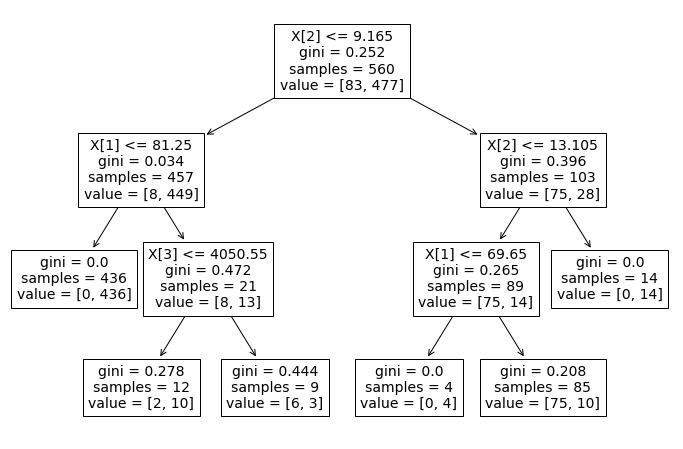

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(model);

## Entropy based Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

[Text(0.5, 0.875, 'X[2] <= 8.36\nentropy = 0.605\nsamples = 560\nvalue = [83, 477]'),
 Text(0.2, 0.625, 'X[1] <= 81.25\nentropy = 0.089\nsamples = 446\nvalue = [5, 441]'),
 Text(0.1, 0.375, 'entropy = 0.0\nsamples = 429\nvalue = [0, 429]'),
 Text(0.3, 0.375, 'X[0] <= 2013.5\nentropy = 0.874\nsamples = 17\nvalue = [5, 12]'),
 Text(0.2, 0.125, 'entropy = 0.722\nsamples = 15\nvalue = [3, 12]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.625, 'X[2] <= 13.105\nentropy = 0.9\nsamples = 114\nvalue = [78, 36]'),
 Text(0.7, 0.375, 'X[1] <= 69.65\nentropy = 0.76\nsamples = 100\nvalue = [78, 22]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.8, 0.125, 'entropy = 0.637\nsamples = 93\nvalue = [78, 15]'),
 Text(0.9, 0.375, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]')]

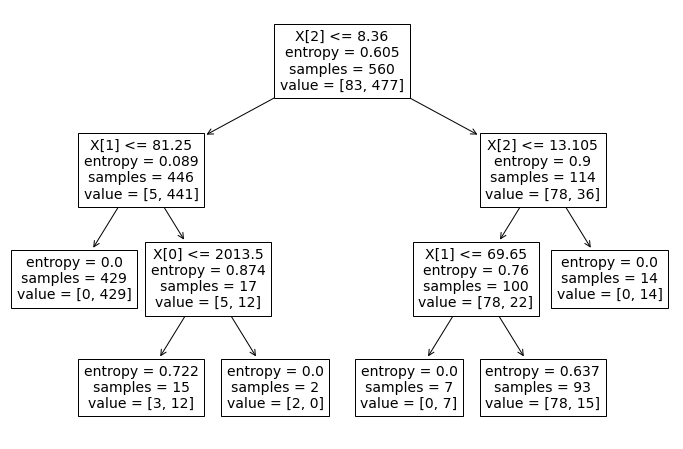

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

### Evaluation of Decision tree based on Entropy value

In [ ]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9679
Test set score: 0.9292


In [ ]:
confusion_matrix(y_test,y_pred_en)

array([[ 30,   4],
       [ 13, 193]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


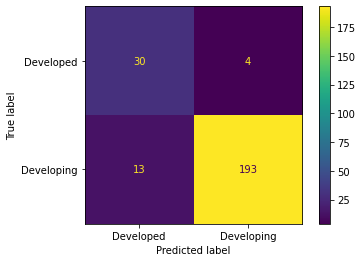

In [ ]:
plot_confusion_matrix(clf_en,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

   Developed       0.70      0.88      0.78        34
  Developing       0.98      0.94      0.96       206

    accuracy                           0.93       240
   macro avg       0.84      0.91      0.87       240
weighted avg       0.94      0.93      0.93       240



In [ ]:
clf_en.feature_importances_

array([0.01498281, 0.15415032, 0.83086688, 0.        , 0.        ,
       0.        ])